# Problem 2: Build a prediction model for salary hike

In [1]:
# Silence warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Stats model library for linear regression.
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse # Mean square error evaluation metric.

In [3]:
%matplotlib notebook
sns.set_context('notebook')

In [4]:
# Matplotlib configurations
#Ref: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 6
MEDIUM_SIZE = 9
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Read and display data frame.

In [5]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis

In [6]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<IPython.core.display.Javascript object>


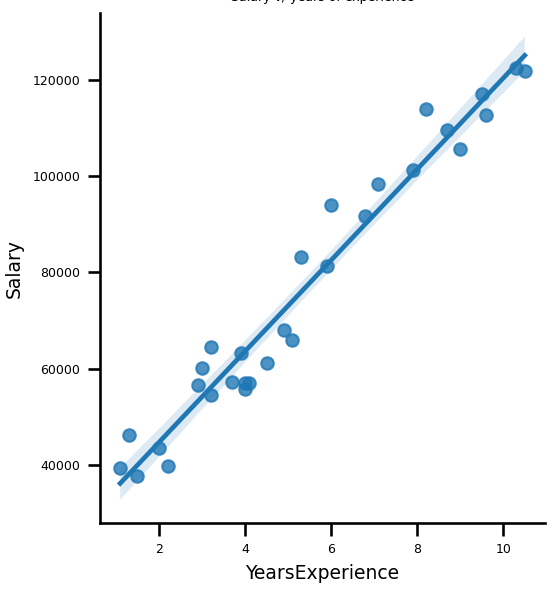

In [7]:
# lmplot to check for linearity.
sns.lmplot(x='YearsExperience', y='Salary', data=salary_df ,height=4)
plt.title("Salary v/ years of experience")
plt.show()

<IPython.core.display.Javascript object>


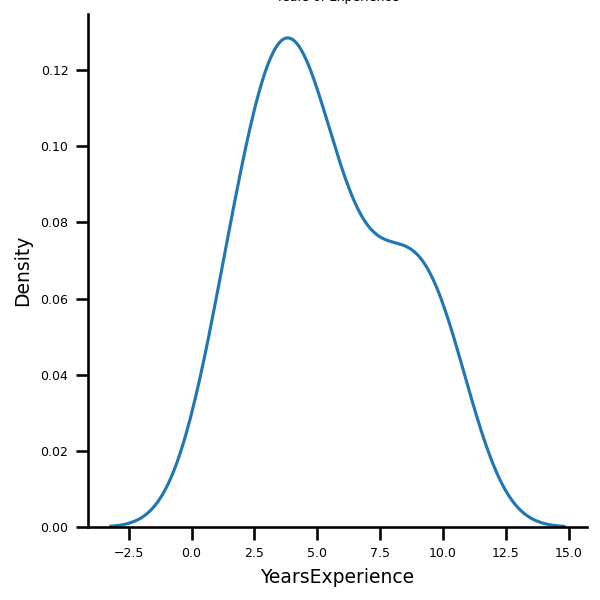

In [8]:
# KDE plot to check nature of data distribution.
sns.displot(data=salary_df.YearsExperience, kind='kde', height=4)
plt.title("Years of Experience")
plt.show()

<IPython.core.display.Javascript object>


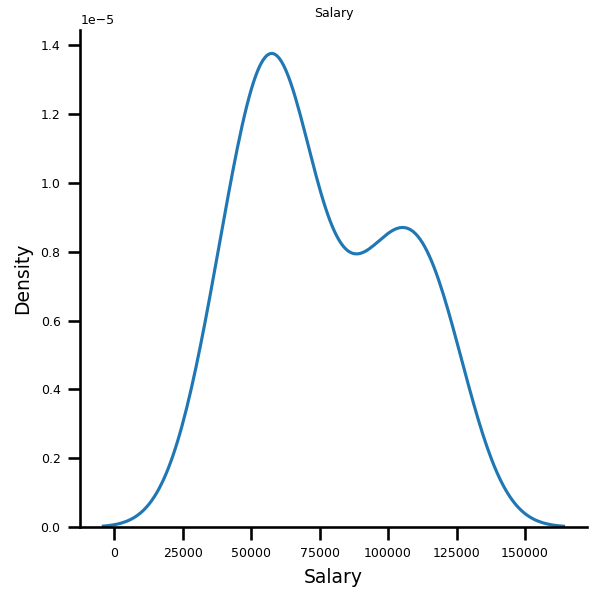

In [9]:
sns.displot(data=salary_df.Salary, kind='kde',height=4)
plt.title("Salary")
plt.show()

<IPython.core.display.Javascript object>


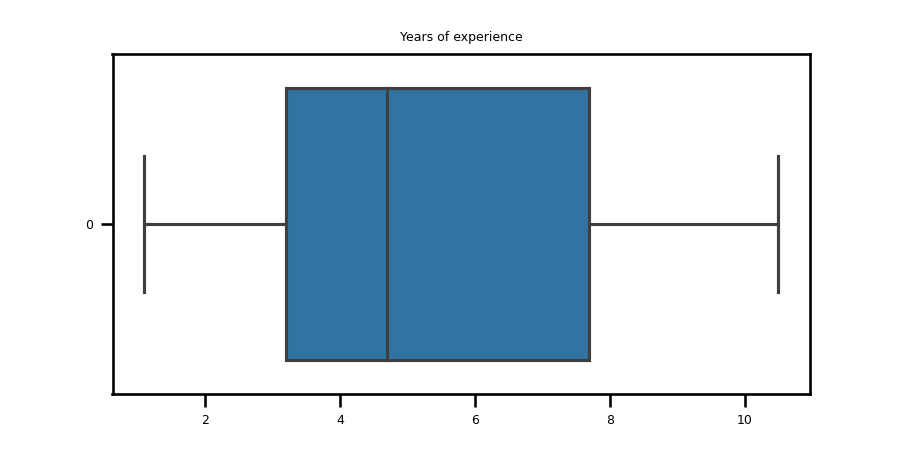

In [10]:
# Boxplot to check for outliers.
fig,ax = plt.subplots(figsize = (6,3))
bxp = sns.boxplot(data=salary_df.YearsExperience, orient='h')
plt.title("Years of experience")
plt.show()

<IPython.core.display.Javascript object>


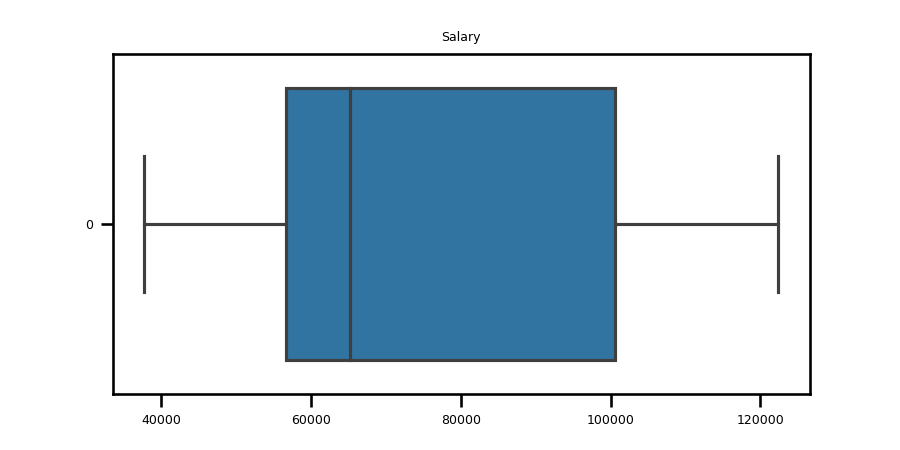

In [11]:
fig,ax = plt.subplots(figsize = (6,3))
bxp = sns.boxplot(data=salary_df.Salary, orient='h')
plt.title("Salary")
plt.show()

### Observations:
- We can see a linear a very good relationship between years of experience and salary from the scatter plots. 
- We can approximately say that both features have a normal distribution from the density plots, although the KDE plots show bimodality .
- The boxplots confirm that there are  no outliers in both years of experience and salary distributions.

## Model building and training

In [12]:
# Ordinary least squares using stats model; Training ang fitting.
lin_model = smf.ols('Salary~YearsExperience', data=salary_df).fit()

# Storing model parameters in a dictionary for further use.
params = {'intercept':lin_model.params[0], 'slope':lin_model.params[1], 'r^2':lin_model.rsquared}

## Manual prediction

In [13]:
years_exp = [1,3,5,13,15,20] # random years of experience values for testing purpose.
salaries = []
decimals = 1 
for exp in years_exp:
    salaries.append(round(params['slope']*exp + params['intercept'],decimals) )
    
test_data = pd.DataFrame({'YearsExperience':years_exp}) # Linear model accepts only pandas dataframes.
pred_salary = lin_model.predict(test_data)
test_data['salary_pred'] = pred_salary

# Rounded off to one decimal places for consistency with the original data.
   
test_data['salary_pred'] = test_data['salary_pred'].apply(lambda x: np.round(x, decimals))
test_data['salary_clc'] = salaries

# Comparing calculated salary from slopes and intercepts with predicted salary.
test_data

,YearsExperience,salary_pred,salary_clc
0,1,35242.2,35242.2
1,3,54142.1,54142.1
2,5,73042.0,73042.0
3,13,148641.7,148641.7
4,15,167541.6,167541.6
5,20,214791.4,214791.4


## Predicting delivery times for sorting times in the original dataset.

In [14]:
# Making predictions on the given dataset
salary_dfpred = lin_model.predict(salary_df['YearsExperience'])
salary_df['Salary_pred'] = salary_dfpred # Adding a new col containing model predicted salary.

# Rounded off to one decimal places for consistency with the original data.
salary_df['Salary_pred'] = salary_df['Salary_pred'].apply(lambda x: np.round(x, decimals))

# Rearrange the columns in salary_df.
salary_df = salary_df[['YearsExperience', 'Salary','Salary_pred']]

# Original data with predicted salaries from the model.
salary_df.head()

,YearsExperience,Salary,Salary_pred
0,1.1,39343.0,36187.2
1,1.3,46205.0,38077.2
2,1.5,37731.0,39967.1
3,2.0,43525.0,44692.1
4,2.2,39891.0,46582.1


In [15]:
# Mean square error to evaluate model performance.
mean_sqr_err = mse(salary_df.Salary, salary_df.Salary_pred)

# Model Summary:
print("Slope (upto 2 decimal places)                                      :",np.round(params['slope'],2))
print("y intercept (upto 2 decimal places)                                :",np.round(params['intercept'],2))
print("R^2 value or coefficient of determination (upto 2 decimal places)  ~",np.round(params['r^2'],2))
print("Mean square error between actual and predicted salaries is         ~",np.round(mean_sqr_err,2))

Slope (upto 2 decimal places)                                      : 9449.96
y intercept (upto 2 decimal places)                                : 25792.2
R^2 value or coefficient of determination (upto 2 decimal places)  ~ 0.96
Mean square error between actual and predicted salaries is         ~ 31270792.77


<IPython.core.display.Javascript object>


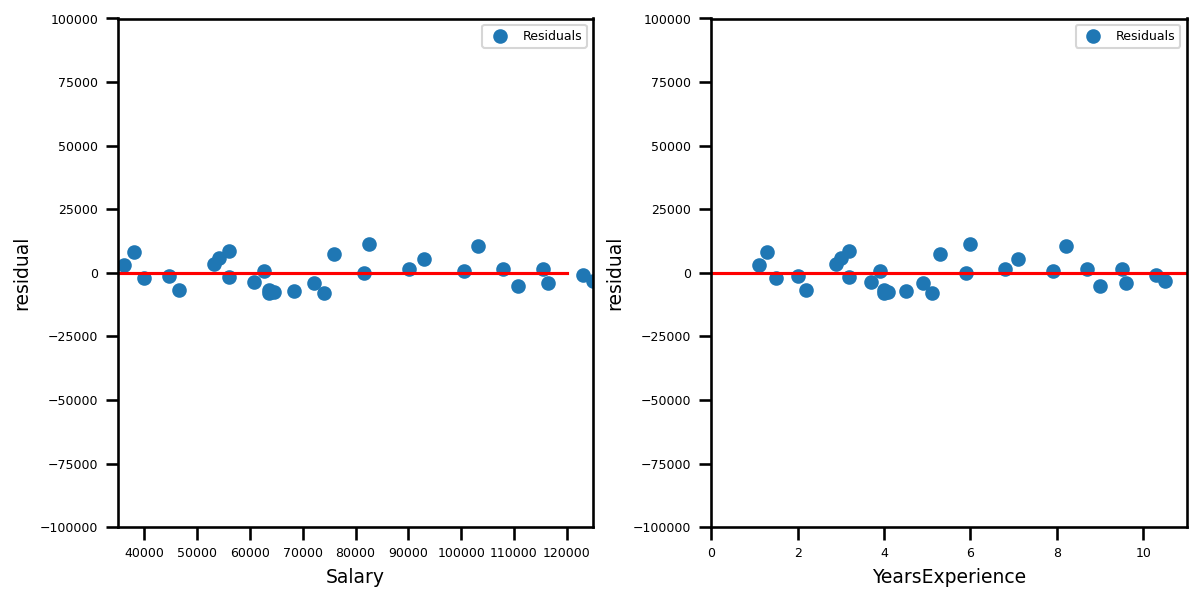

In [16]:
# Get the residuals for the linear regression.
residuals = lin_model.resid

# Plot the residuals.
fig,(ax1,ax2) = plt.subplots(figsize = (8,4), nrows = 1, ncols = 2)

ax1.scatter(x = salary_df.Salary_pred, y = residuals, label = 'Residuals')
ax1.plot([30000,120000],[0,0], 'r-')
ax1.set_xlim(35000,125000)
ax1.set_ylim(-100000,100000) # Chosen large Y axis, to show the comparison between residual and actual salary.
ax1.set_xlabel("Salary")
ax1.set_ylabel("residual")
ax1.legend()

ax2.scatter(x = salary_df.YearsExperience, y = residuals, label = 'Residuals')
ax2.plot([0,11],[0,0], 'r-')
ax2.set_xlim(0,11)
ax2.set_ylim(-100000,100000)
ax2.set_xlabel("YearsExperience")
ax2.set_ylabel("residual")
ax2.legend()

fig.tight_layout()# To set spacing between two plots
plt.show()

## Conclusion:
A linear model was fit for the data given and slope and intercept of the line of best fit was obtained. The following are the parameters.
- **Slope** = 9449.96
- **Intercept** = 25792.2
- **Coefficient of determination or r^2** = 0.96

From the above residual plots and r^2 values, we can see that the regression line is a good fit for the data. This can be especially seen from the r^2 value which is around 0.96, very close to 1. Predictions will be accurate wih a very small error margin. 